# EFFECT OF MODEL COMPLEXITY

In this jupyter notebook we will investigate effect of model complexity on the performance of polynomial model utilizing meshplot of decision boundary. Here we will use the function polynomial_dataFrame_multi_features which create polynomial data for multiple features.

**Add the directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import pandas as pd
import numpy as np
from m_learn.utility.data_preprocessing import polynomial_dataFrame_multi_features, mesh_data
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Load and preprocess data

In [3]:
# load the iris data
iris = datasets.load_iris()
# load features of the model
features = iris.feature_names
# store the feature columns in pandas dataframe
data = pd.DataFrame(iris.data, columns=features)
# create the ouput column
data["encoded_labels"] = iris.target
# shuffle the data
data = data.sample(frac=1, random_state=1).reset_index(drop=True)
# create a column for string labels
data['labels'] = data["encoded_labels"].replace([0,1,2], iris.target_names)

**Display the head of the data**

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_labels,labels
0,5.8,4.0,1.2,0.2,0,setosa
1,5.1,2.5,3.0,1.1,1,versicolor
2,6.6,3.0,4.4,1.4,1,versicolor
3,5.4,3.9,1.3,0.4,0,setosa
4,7.9,3.8,6.4,2.0,2,virginica


**Do a train test split of the data**

In [5]:
train_data, test_data = train_test_split(data, test_size = 0.266, random_state = 1)

# 2. Investigate performance of a model trained with polynomials of 2 features

**Features and output of the model**

In [6]:
features = ['petal length (cm)', 'petal width (cm)']
output = "encoded_labels"

### 2.1 Create a degree 2 polynomial (quadratic) data set

In [7]:
# degree of Polynomial
degree = 2
# create polynomial training set using the preprocessing function
square_data_train = polynomial_dataFrame_multi_features(train_data,features,degree,output)
# create polynomial test set using the preprocessing function
square_data_test = polynomial_dataFrame_multi_features(test_data,features,degree,output)

Display the polynomial data

In [8]:
square_data_train.head(10)

,petal length (cm)_power1,petal length (cm)_power2,petal width (cm)_power1,petal width (cm)_power2,encoded_labels
112,1.4,1.96,0.2,0.04,0
17,4.5,20.25,1.5,2.25,1
119,4.5,20.25,1.7,2.89,2
103,3.8,14.44,1.1,1.21,1
58,6.7,44.89,2.0,4.00,2
118,5.2,27.04,2.0,4.00,2
18,1.5,2.25,0.4,0.16,0
4,6.4,40.96,2.0,4.00,2
45,6.9,47.61,2.3,5.29,2
59,4.2,17.64,1.2,1.44,1


### 2.2 Train a logistic regression model using polynomial features

**Extract the polynomial features**

In [9]:
square_features = square_data_train.columns.tolist()
square_features.remove(output)

**Create and train the model using the polynomial features**

In [17]:
square_model = LogisticRegression(solver='liblinear')
square_model.fit(square_data_train[square_features], square_data_train[output])

LogisticRegression(solver='liblinear')

### 2.3 Create a mesh plot of the decision boundary

**Create mesh data**

In [18]:
# step size of the mesh plot
mesh_step = 0.02
# extract the xx & yy matrices and the unravelled mesh points
xx, yy, mesh_points = mesh_data(data, features, mesh_step = 0.02)
# create polynomial data for the mesh points
mesh_data_square = polynomial_dataFrame_multi_features(mesh_points, features, degree)
# create predictions of the mesh points
square_predictions = square_model.predict(mesh_data_square)
# convert the predictions into numpy array
square_predictions = np.array(square_predictions)
# reshape the array so that it fits the mesh plot
square_predictions = square_predictions.reshape(xx.shape)

#### Mesh plot of decision boundary

<ipython-input-19-7fe9bd586aac>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, square_predictions, cmap=plt.cm.Paired)


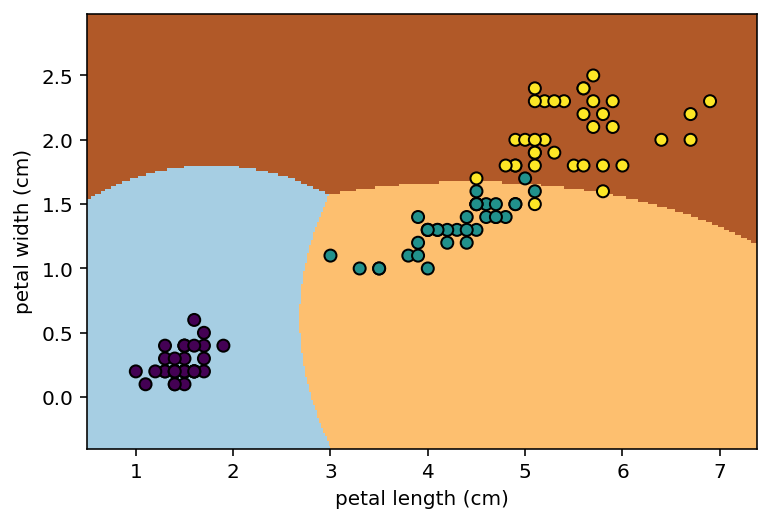

In [19]:
plt.pcolormesh(xx, yy, square_predictions, cmap=plt.cm.Paired)
plt.scatter(train_data[features[0]], train_data[features[1]], c = train_data[output], edgecolors='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

#### Accuracy of the model

In [20]:
print("Accuracy of the quadratic_model: ", square_model.score(square_data_test[square_features], test_data[output]))

Accuracy of the quadratic_model:  0.925


# 3. Investigate decision boundaries of models trained with different degrees of polynomial features

### 3.1 A function that shows mesh plot of decision boundaries of models having different degrees of polynomial features

In [23]:
def polynomial_plot_classification(data, features, output, degrees, model, test_size, subplot_dimension,**kwargs):
    
    '''
    Arguments:
    data - a pandas dataframe containing features and output columns
    features - python list containing the 2 features' names whose polynomial features are wanted
    output - python string containing the output's name
    degrees - list of degrees of polynomial data selected for investigation
    model - a sklearn object of uninvoked linear classifier
    test_size - test size
    subplot_dimension - dimension of the matplotlib subplot
    **kwargs - keyword arguments passed to the linear classifier
    '''
    
    # iterate through each degree of polynomial data
    for n, degree in enumerate(degrees):
    
        # do a train test split
        train_data, test_data = train_test_split(data, test_size = test_size, random_state = 0)

        # create polynomial data for train and test set
        polynomial_data_train = polynomial_dataFrame_multi_features(train_data,features,degree,output)
        polynomial_data_test = polynomial_dataFrame_multi_features(test_data,features,degree,output)

        # extract the polynomial features' names
        polynomial_features = polynomial_data_train.columns.tolist()
        polynomial_features.remove(output)

        # create and fit logistic regression model using the polynomial features
        polynomial_features_model = model(solver='liblinear')
        polynomial_features_model.fit(polynomial_data_train[polynomial_features], polynomial_data_train[output])
        
        # compute accuracy of the model using test data
        accuracy = polynomial_features_model.score(polynomial_data_test[polynomial_features], polynomial_data_test[output])

        # create xx,yy and z data for mesh plot
        xx, yy, mesh_points = mesh_data(data, features, mesh_step = 0.02)
        polynomial_mesh_data = polynomial_dataFrame_multi_features(mesh_points, features, degree)
        polynomial_predictions = polynomial_features_model.predict(polynomial_mesh_data)
        polynomial_predictions = np.array(polynomial_predictions)
        polynomial_predictions = polynomial_predictions.reshape(xx.shape)

        # create mesh plot of decision boundary,
        # create scatter plot of training points, and
        # print the polynomial degree and accuracy in the title
        plt.subplot(subplot_dimension[0],subplot_dimension[1], n+1)
        plt.pcolormesh(xx, yy, polynomial_predictions, cmap=plt.cm.Paired)
        plt.scatter(train_data[features[0]], train_data[features[1]], c = train_data[output], edgecolors='k')
        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.title("Degree: "+str(degree)+", Accuracy:"+str(accuracy))
        
    plt.show()

### 3.2 Investigate performance of polynomial models with petal length and petal width as the features

<ipython-input-23-b1ad9e55e83f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, polynomial_predictions, cmap=plt.cm.Paired)
<ipython-input-23-b1ad9e55e83f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, polynomial_predictions, cmap=plt.cm.Paired)
<ipython-input-23-b1ad9e55e83f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify

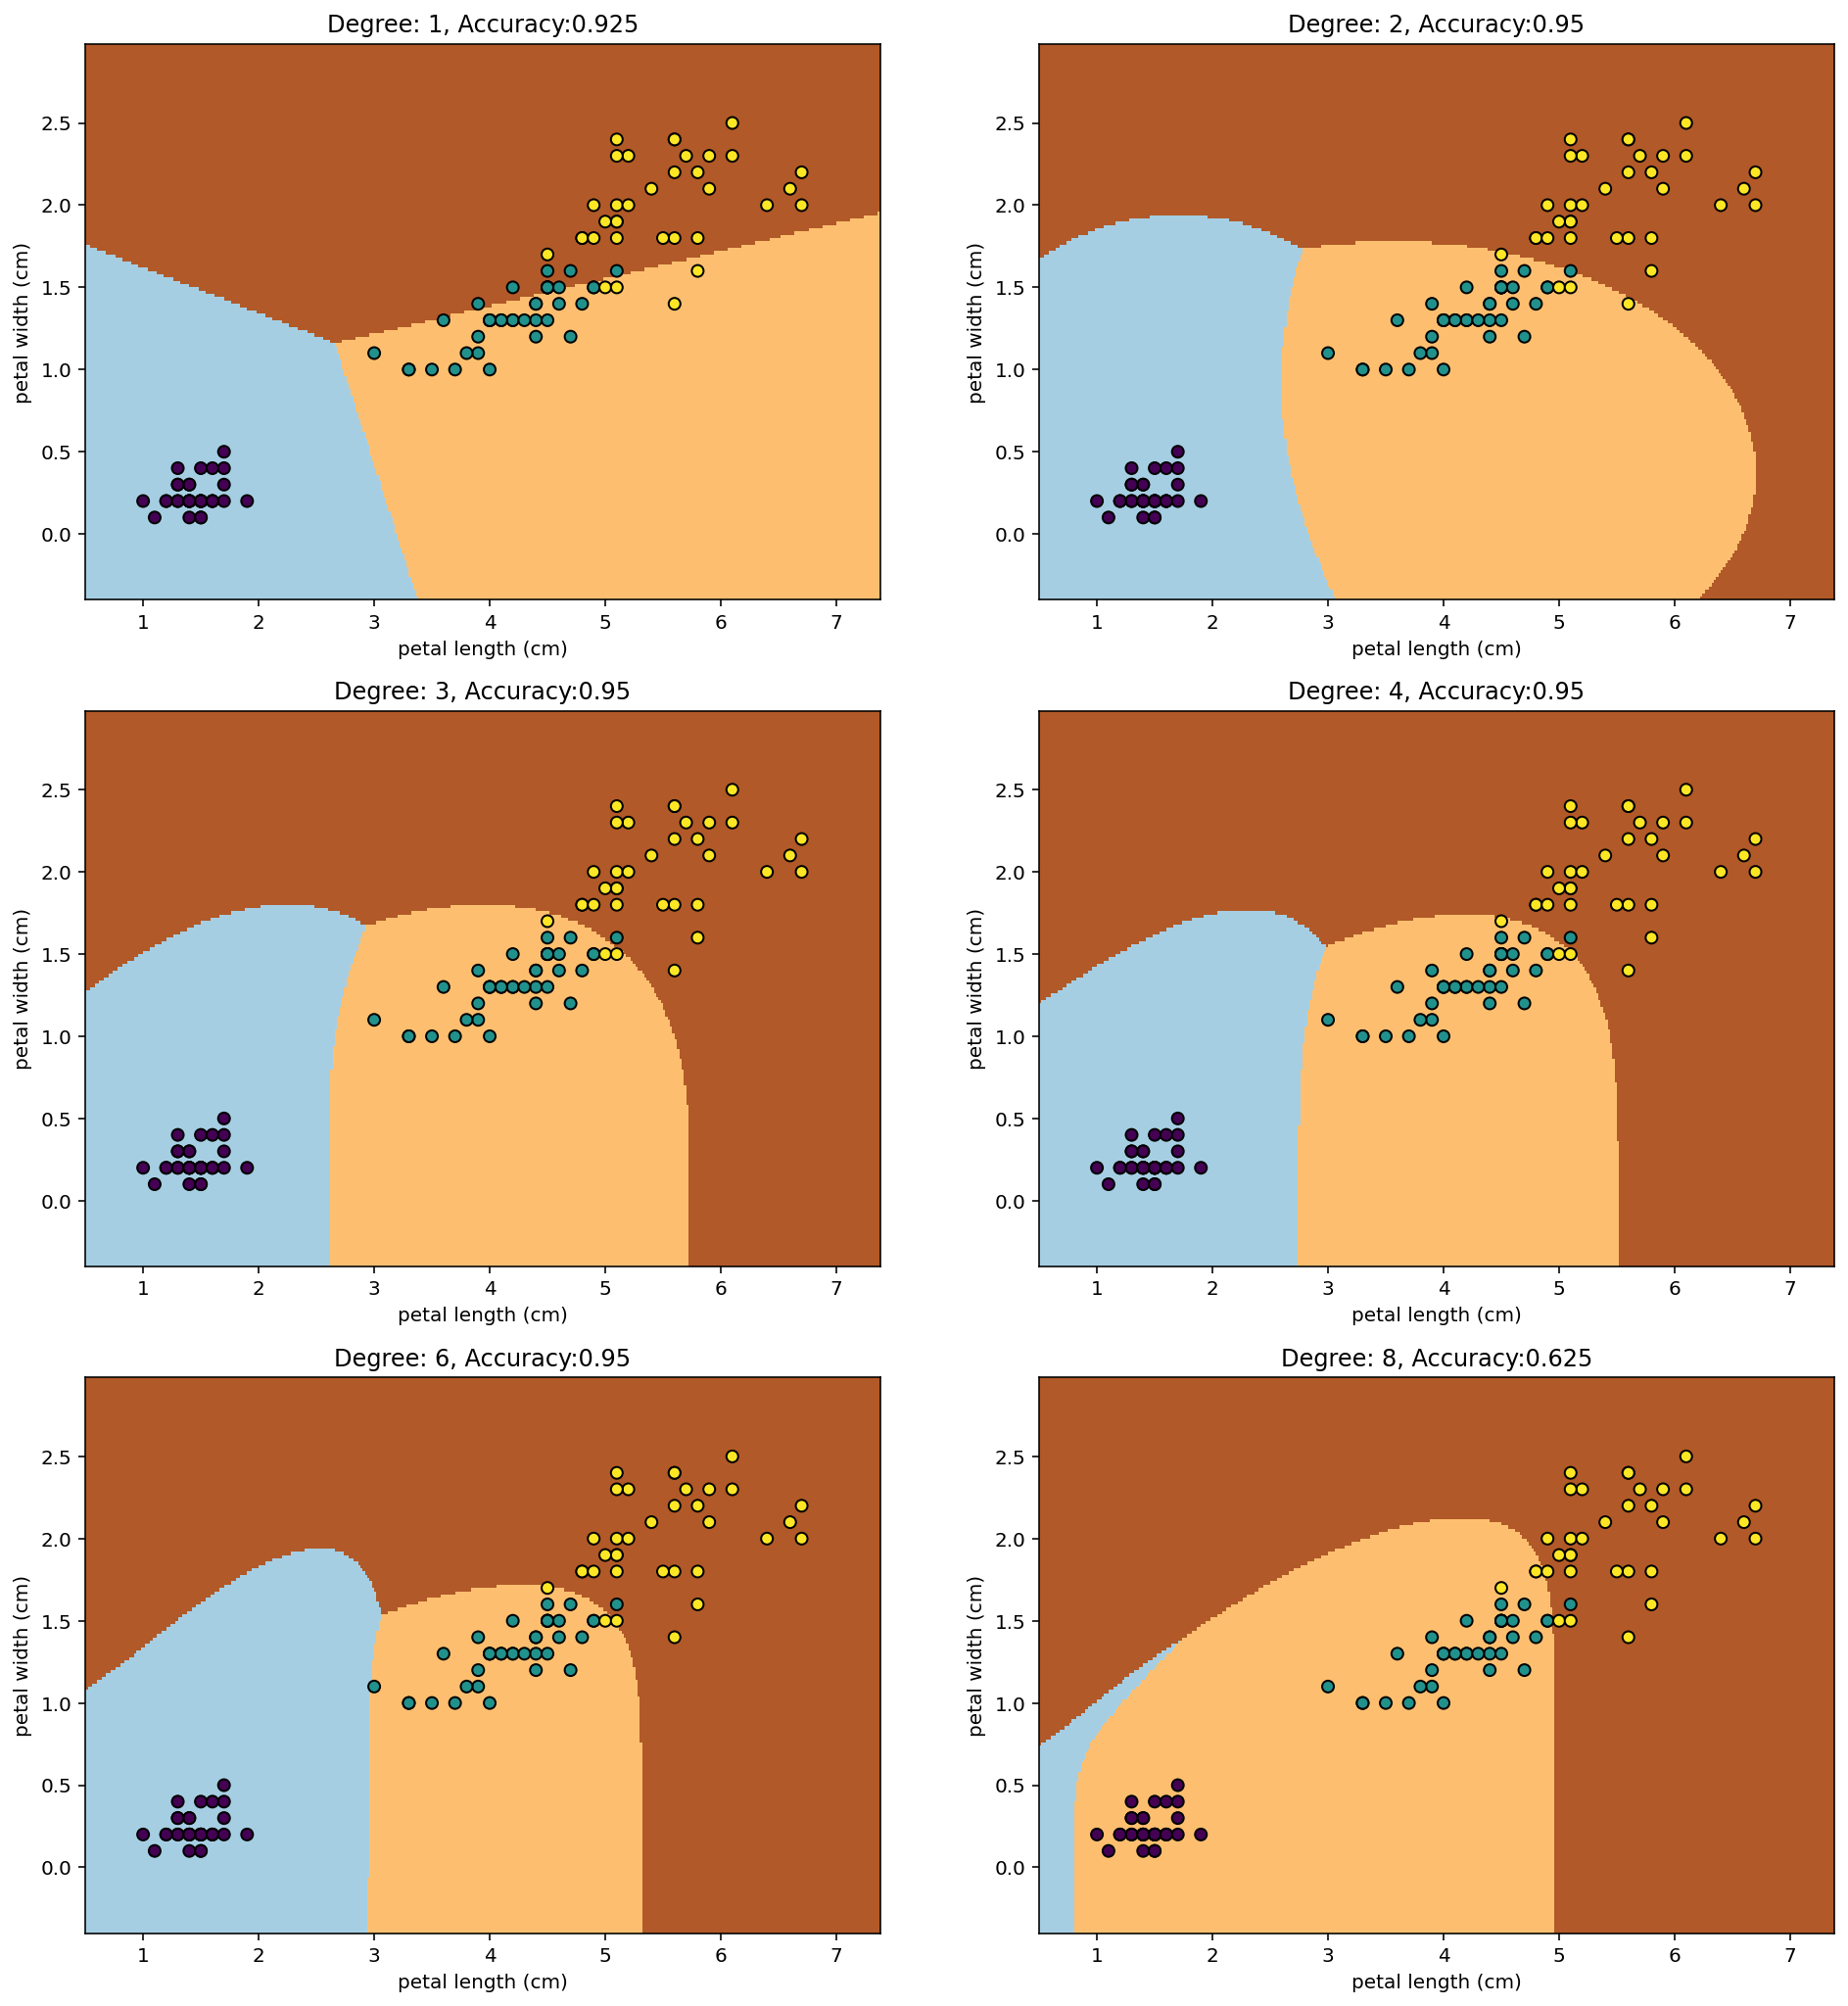

In [24]:
matplotlib.rcParams['figure.figsize'] = (16.0, 24.0)
# model parameters
features = ['petal length (cm)', 'petal width (cm)']
output = "encoded_labels"
test_size = 0.266
degrees = [1,2,3,4,6,8]
subplot_dimension = (4,2)

# create an uninvoked logistic regression model
model = LogisticRegression
# plot the decision boundaries of the polynomial models and print the accuracy
polynomial_plot_classification(data, features, output, degrees, model, test_size, subplot_dimension)

### 3.3 Investigate performance of polynomial models with sepal length and petal width as the features

<ipython-input-23-b1ad9e55e83f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, polynomial_predictions, cmap=plt.cm.Paired)
<ipython-input-23-b1ad9e55e83f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, polynomial_predictions, cmap=plt.cm.Paired)
<ipython-input-23-b1ad9e55e83f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify

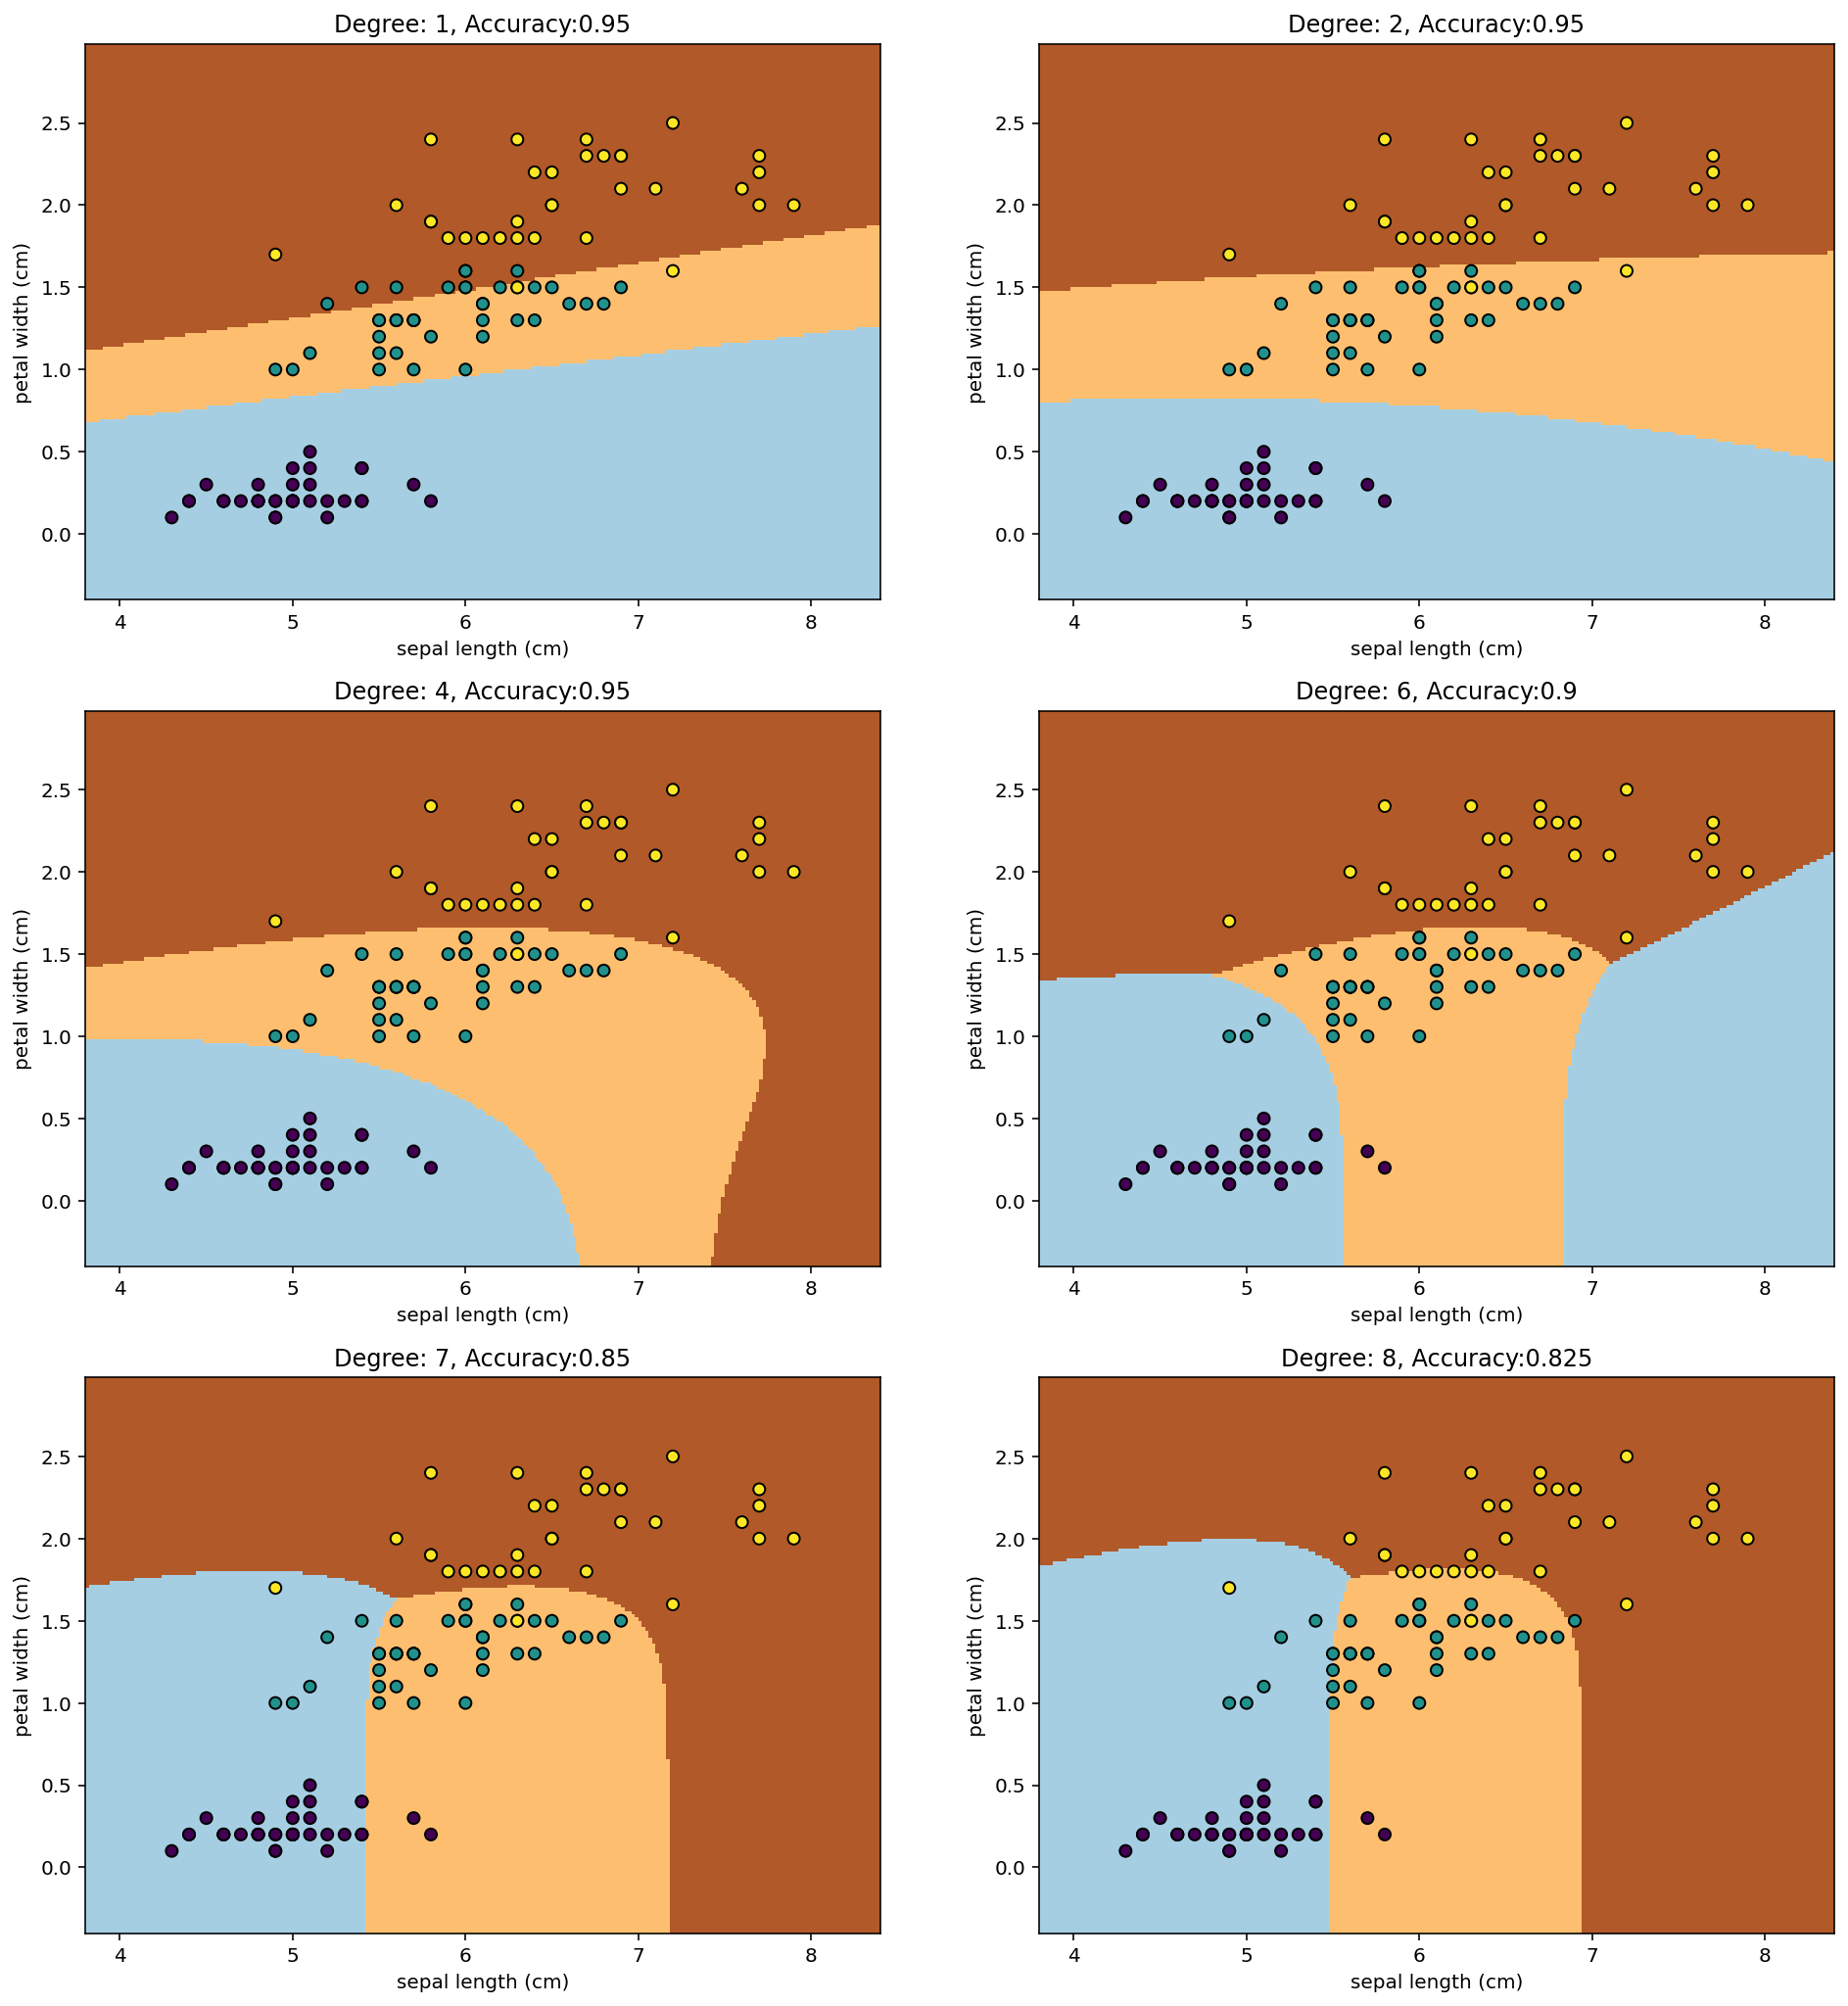

In [25]:
matplotlib.rcParams['figure.figsize'] = (16.0, 24.0)
# model parameters
features = ['sepal length (cm)', 'petal width (cm)']
output = "encoded_labels"
test_size = 0.266
degrees = [1,2,4,6,7,8]
subplot_dimension = (4,2)

# create an uninvoked logistic regression model
model = LogisticRegression
# plot the decision boundaries of the polynomial models and print the accuracy
polynomial_plot_classification(data, features, output, degrees, model, test_size, subplot_dimension)